In [21]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed
from keras.layers import Activation
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.callbacks import LambdaCallback
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K
from keras.layers import Activation
from keras.utils import plot_model

In [0]:
!pip install tensorflow-gpu==1.14.0

     |████████████████████████████████| 377.0MB 46kB/s 


In [0]:
pip install tensorflow==1.14

ERROR! Session/line number was not unique in database. History logging moved to new session 59
     |████████████████████████████████| 109.2MB 37kB/s 
     |████████████████████████████████| 491kB 38.8MB/s 
     |████████████████████████████████| 3.2MB 41.3MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Found existing installation: tensorflow 2.2.0rc1
    Uninstalling tensorflow-2.2.0rc1:
      Successfully uninstalled tensorflow-2.2.0rc1


In [0]:
def custom_activation(x, beta = 0.999):
        return (K.sigmoid(beta * x) * x)

get_custom_objects().update({'custom_activation': Activation(custom_activation)})

NameError: ignored

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Подключение диска
#Создание массива

array =[]
with open("/content/drive/My Drive/Colab Notebooks/Data/catemsd_all_noaft_y.txt") as file:
    for line in file:
        array.append([float(x) for x in line.split()])
array = np.array(array, dtype=np.float64)



*   1990 начинается на 40308
*   1991 начинается на 41448
*   1992 начинается на 42470
*   1993 начинается на 43945
*   1994 начинается на 45490
*   1995 начинается на 46968
*   1996 начинается на 48483
*   1996 заканчивается на 50974
*   1996 длится 2491 строчек



*   1997 начинается на 50975
*   1997 заканчивается на 53472
*   1997 длится 2497 строчек

In [0]:
#Функция подготовки тренировочного массива

def DatalongitudePreparation(length_test,testing_start,training_start,x_train_longitude, y_train_longitude,x_test_longitude,y_test_longitude,length,number_per_epoch,array,sc_time_train,sc_time_test,sc_latitude,sc_longitude,sc_depth,sc_magnitude):
  time_train = np.zeros(shape=(length+number_per_epoch,1))
  time_test = np.zeros(shape=(length+number_per_epoch,1))
  time = np.zeros(shape=(array.shape[0],1))
  latitude = np.zeros(shape=(array.shape[0],1))
  longitude = np.zeros(shape=(array.shape[0],1))
  depth = np.zeros(shape=(array.shape[0],1))
  magnitude = np.zeros(shape=(array.shape[0],1))
  
  time=time.astype('float64')
  latitude=latitude.astype('float64')
  longitude = longitude.astype('float64')
  depth =depth.astype('float64')
  magnitude =magnitude.astype('float64')

  for i in range(array.shape[0]):
    time[i] = array[i][0]
    latitude[i] = array[i][1]
    longitude[i] = array[i][2]
    depth[i] = array[i][3]
    magnitude[i] = array[i][4]  
  
  mean_latitude = latitude.mean()
  mean_longitude=longitude.mean()

  for i in range(array.shape[0]):
    longitude[i]=(longitude[i]-mean_longitude)
    latitude[i]=(latitude[i]-mean_latitude)

 
  for i in range(number_per_epoch+length):    
    time_train[i]=time[i+training_start]-time[training_start+i]
    #print(time_train[i]) 
    if(time_train[i]>1):
      print(time_train[i],i) 
  for i in range(+number_per_epoch+length):
    time_test[i]=time[i+training_start]-time[testing_start+i-1]  
  
  
  time_train=sc_time_train.fit_transform(time_train)
  time_test=sc_time_test.fit_transform(time_test)
  latitude=sc_latitude.fit_transform(latitude)
  longitude=sc_longitude.fit_transform(longitude)
  depth=sc_depth.fit_transform(depth)
  magnitude=sc_magnitude.fit_transform(magnitude)
  
  for i in range(length):
    for j in range(number_per_epoch):
      x_train_longitude[i][j][0]=time_train[i+j] 
      x_train_longitude[i][j][1]=latitude[i+j+training_start]
      x_train_longitude[i][j][2]=longitude[i+j+training_start]
    y_train_longitude[i]=longitude[i+j+1]
     
  for i in range(length_test):
    for j in range(number_per_epoch):
      x_test_longitude[i][j][0]=time_test[i+j] 
      x_test_longitude[i][j][1]=latitude[i+j+testing_start]
      x_test_longitude[i][j][2]=longitude[i+j+testing_start]
    y_test_longitude[i]=longitude[i+j+1]


In [0]:
#Задание длинны тренировочного массива и колличество данных в одной порции

length=4000
length_test =100
training_start = 45490
testing_start=50975
number_per_epoch=20
feature_number=3

x_train_longitude = np.zeros(shape=(length,number_per_epoch,3))
y_train_longitude = np.zeros(shape=(length,1))
x_test_longitude = np.zeros(shape=(length,number_per_epoch,3))
y_test_longitude=np.zeros(shape=(length,1))

x_train_longitude=x_train_longitude.astype('float64')
y_train_longitude=y_train_longitude.astype('float64')
x_test_longitude=x_test_longitude.astype('float64')
y_test_longitude=y_test_longitude.astype('float64')

sc_time_train=MinMaxScaler(feature_range=(0,1))
sc_time_test=MinMaxScaler(feature_range=(0,1))
sc_latitude=MinMaxScaler(feature_range=(-1,1))
sc_longitude=MinMaxScaler(feature_range=(-1,1))
sc_depth=MinMaxScaler(feature_range=(0,1))
sc_magnitude=MinMaxScaler(feature_range=(0,1))



DatalongitudePreparation(length_test,testing_start,training_start,x_train_longitude, y_train_longitude,x_test_longitude,y_test_longitude,length,number_per_epoch,array,sc_time_train,sc_time_test,sc_latitude,sc_longitude,sc_depth,sc_magnitude)




In [0]:
print(x_train_longitude.shape[1])

20


In [0]:
print(sc_time.inverse_transform(model_time.predict(x_test_time)))
print(sc_time.inverse_transform(y_test_time))

[[1960.71]]
[[1962.0221]]


In [28]:
model_longitude = Sequential()
model_longitude.add(LSTM(units=550, return_sequences= True, input_shape=(x_train_longitude.shape[1],3)))
#model_latitude.add(LSTM(units=550, return_sequences=True))
model_longitude.add(LSTM(units=550))
model_longitude.add(Dense(units=1))
model_longitude.summary()

model_longitude.compile(optimizer=RMSprop(lr=0.001), loss='mean_squared_error')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 20, 550)           1218800   
_________________________________________________________________
lstm_4 (LSTM)                (None, 550)               2422200   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 551       
Total params: 3,641,551
Trainable params: 3,641,551
Non-trainable params: 0
_________________________________________________________________


In [0]:
hist_longitude=model_longitude.fit(x_train_longitude,y_train_longitude, epochs=900, batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/900





4000/4000 [==============================] - 19s 5ms/step - loss: 0.0290
Epoch 2/900
4000/4000 [==============================] - 10s 2ms/step - loss: 0.0281
Epoch 3/900
4000/4000 [==============================] - 10s 2ms/step - loss: 0.0258
Epoch 4/900
4000/4000 [==============================] - 10s 2ms/step - loss: 0.0295
Epoch 5/900
4000/4000 [==============================] - 10s 2ms/step - loss: 0.0256
Epoch 6/900
4000/4000 [==============================] - 10s 2ms/step - loss: 0.0258
Epoch 7/900
4000/4000 [==============================] - 10s 2ms/step - loss: 0.0257
Epoch 8/900
4000/4000 [==============================] - 10s 2ms/step - loss: 0.0256
Epoch 9/900
4000/4000 [==============================] - 10s 2ms/step - loss: 0.0256
Epoch 10/900
4000/4000 [==============================] - 10s 2ms/step - loss: 0.0256
Epoch 11/900
4000/4000 [=======================

In [0]:
model_time.evaluate(x_test_time,y_test_time,batch_size=32)

In [0]:
plot_model(model_time,show_shapes=True, to_file='model.png')

In [0]:
plot_model(model_coords,show_shapes=True, to_file='model.png')

In [0]:
model_longitude.save_weights('/content/drive/My Drive/Colab Notebooks/Saved models/NewGen/Final/coursework_dims_LSTM_longitude.h5')
#model_coords.save_weights('/content/drive/My Drive/Colab Notebooks/Saved models/NewGen/coursework_dims_LSTM_coords.h5')     

In [0]:
model_longitude.load_weights('/content/drive/My Drive/Colab Notebooks/Saved models/NewGen/Final/coursework_dims_LSTM_longitude.h5')

In [30]:
print(model_longitude.predict(x_test_longitude))

[[-0.11995295]
 [-0.1762285 ]
 [-0.1991955 ]
 ...
 [-0.13634896]
 [-0.13634896]
 [-0.13634896]]


NameError: ignored

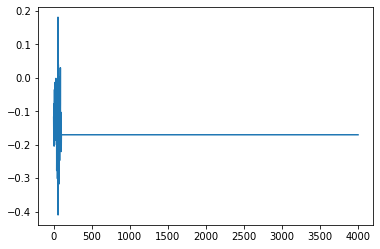

In [0]:
plt.plot(model_longitude.predict(x_test_longitude), label='Predicted')
plr.plot(y_test_longitude,label = 'Real')
plt.show

In [0]:
pred=model_longitude.predict(x_test_longitude)
for i in range(length_test):
  print('Predicted:',pred[i],'Real',y_test_longitude[i])

In [0]:
plt.plot(hist_longitude.history['loss'], label='Loss')
#plt.plot(hist_time.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss longitude')
plt.legend(loc='upper right')

In [0]:
def TimePrediction(x_test_array, y_test_array,sc_time):
  pred = np.zeros(shape = (y_test_array.shape[0]))
  pred = pred.astype('float32')  
  pred=model_time.predict(x_test_array)
  pred=sc_time.inverse_transform(pred)
  y_test_time_plot=sc_time.inverse_transform(y_test_time)
  print(y_test_time_plot)
  plt.plot(pred, label='Predicted')
  plt.plot(y_test_time_plot, label='Real')
  plt.xlabel('Epoch')
  plt.ylabel('Time')
  plt.title('Time')
  plt.legend(loc='upper right')
  plt.show()

In [0]:
TimePrediction(x_test_time,y_test_time,sc_time)

In [0]:
def change_boss_of_this_gym(pred_time,pred_coords,val_par):
  for i in range(val_par.shape[0]-1):
    val_par[0][i]=val_par[i+1]
  val_par[0][val_par.shape[0]][0]=pred_time[0]
  val_par[0][val_par.shape[0]][1]=pred_coords[0][0]
  val_par[0][val_par.shape[0]][2]=pred_coords[0][1]


In [0]:
def print_resaults(pred_array):
  print(pred_array)
  plt.scatter(pred_array[0][1],pred_array[0][2])
  plt.title('Predicted coordinates')
  plt.xlabel('latitude')
  plt.ylabel('longitude')
  plt.show()

  plt.plot(pred_array[0][0])
  plt.title('Predicted time')
  plt.xlabel('Number')
  plt.ylabel('time')
  plt.show()
  

In [0]:
Prediction(model_time,model_coords, array,10)

In [0]:
def Prediction(model_time,model_coords, array, number):
  sc_time=MinMaxScaler(feature_range=(0,1))
  sc_latitude=MinMaxScaler(feature_range=(0,1))
  sc_longitude=MinMaxScaler(feature_range=(0,1))

  time = np.zeros(shape=(array.shape[0],1))
  latitude = np.zeros(shape=(array.shape[0],1))
  longitude = np.zeros(shape=(array.shape[0],1))
    
  time=time.astype('float32')
  latitude=latitude.astype('float32')
  longitude = longitude.astype('float32')
  
  for i in range(array.shape[0]):
    time[i] = array[i][0]
    latitude[i] = array[i][1]
    longitude[i] = array[i][2]
  
  mean_latitude = latitude.mean()
  mean_longitude=longitude.mean()

  for i in range(array.shape[0]):
    longitude[i]=(longitude[i]-mean_longitude)
    latitude[i]=(latitude[i]-mean_latitude)
  
  for i in range(1,array.shape[0]):
    time[i]=time[i]-time[i-1]
  first_time = time[0]
  time[0]=0

  time=sc_time.fit_transform(time)
  latitude=sc_latitude.fit_transform(latitude)
  longitude=sc_longitude.fit_transform(longitude)

  val_par = np.zeros(shape=(1,30,3))
  pred_array = np.zeros(shape = (number,3,1))

  pred_array = pred_array.astype('float32')  
  val_par=val_par.astype('float32')  
 
  for i in range(30):
    val_par[0][i][0] = time[i]
    val_par[0][i][1] = latitude[i]
    val_par[0][i][2]= longitude[i]

  for i in range(number):
    pred_time = model_time.predict(val_par)
    pred_coords = model_coords.predict(val_par)
    change_boss_of_this_gym(pred_time,pred_coords,val_par)
    pred_array[i][0]=pred_time
    pred_array[i][1]=pred_coords[0][0]
    pred_array[i][2]=pred_coords[0][1]

  pred_array[0] = sc_time.inverse_transform(pred_array[0])
  pred_array[1] = sc_latitude.inverse_transform(pred_array[1])
  pred_array[2] = sc_longitude.inverse_transform(pred_array[2])

  for i in range(pred_array.shape[0]):
    pred_array[i][0] = pred_array[i][0]+first_time
    pred_array[i][1] = pred_array[i][1]+mean_latitude
    pred_array[i][2] = pred_array[i][2]+mean_longitude

  print_resaults(pred_array)

In [0]:
model_time.load_weights('/content/drive/My Drive/Colab Notebooks/Saved models/NewGen/coursework_dims_LSTM_time.h5')
model_coords.load_weights('/content/drive/My Drive/Colab Notebooks/Saved models/NewGen/coursework_dims_LSTM_coords.h5')

In [0]:
def GetTestData(x_test_time,y_test_time,array,length_test,lenght_start,sc_time,sc_latitude,sc_longitude,sc_depth,sc_magnitude):
  time_test = np.zeros(shape=(array.shape[0],1))
  latitude_test = np.zeros(shape=(array.shape[0],1))
  longitude_test = np.zeros(shape=(array.shape[0],1))
  depth_test = np.zeros(shape=(array.shape[0],1))
  magnitude_test = np.zeros(shape=(array.shape[0],1))
  
  time_test=time_test.astype('float64')
  latitude_test=latitude_test.astype('float64')
  longitude_test = longitude_test.astype('float64')
  depth_test =depth_test.astype('float64')
  magnitude_test =magnitude_test.astype('float64')

  for i in range(array.shape[0]):
    time_test[i] = array[i][0]
    latitude_test[i] = array[i][1]
    longitude_test[i] = array[i][2]
    depth_test[i] = array[i][3]
    magnitude_test[i] = array[i][4]  
  

  
  mean_latitude_test = latitude_test.mean()
  mean_longitude_test=longitude_test.mean()

  for i in range(array.shape[0]):
    longitude_test[i]=(longitude_test[i]-mean_longitude_test)
    latitude_test[i]=(latitude_test[i]-mean_latitude_test)

  for i in range(1,array.shape[0]):
    time_test[i]=time_test[i]-array[i-1][0]   

  time_test=sc_time.fit_transform(time_test)
  latitude_test=sc_latitude.fit_transform(latitude_test)
  longitude_test=sc_longitude.fit_transform(longitude_test)
  depth_test=sc_depth.fit_transform(depth_test)
  magnitude_test=sc_magnitude.fit_transform(magnitude_test)

  for i in range(length_test):
    for j in range(number_per_epoch):
      x_test_time[i][j][0]=time_test[i+j+lenght_start]
      x_test_time[i][j][1]=latitude_test[i+j+lenght_start]
      x_test_time[i][j][2]=longitude_test[i+j+lenght_start]    
    y_test_time[i]=time_test[i+j+1+lenght_start]
   
    
    

In [0]:
lenght_start=8
length_test=1

x_test_time = np.zeros(shape=(length_test,number_per_epoch,3))
y_test_time = np.zeros(shape=(length_test,1))

x_test_time=x_test_time.astype('float64')
y_test_time=y_test_time.astype('float64')


GetTestData(x_test_time,y_test_time,array,length_test,lenght_start,sc_time,sc_latitude,sc_longitude,sc_depth,sc_magnitude)